# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [1]:
# Choisir une année
year = 1908

In [ ]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
# Ici en fois de faire un loop, c'est possible de faire une liste 
# year is String dans le txt (I think everithing is string)
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

NameError: name 'os' is not defined

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

22

In [8]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:300]

'N<> 17\n\nCOMPTE RENDU DE LA SEANCE DU 1 AOUT 1947.\ner\n\nVILLE DE BRUXELLES\n\nBULLETIN COMMUNAL\nAnnée\n\n1947\n\nCONSEIL COMMUNAL\nSéance du I\n\ner\n\naoût 1947.\n\nPrésidence de M . J. V A N D E M E U L E B R O E C K ,\nBourgmestre.\n\nSOMMAIRE :\n\nPAGE\n\nExercice 1947. — Examen du projet de budget . , .\nAdoption.\n\n1'

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'N<> 17\n\nCOMPTE RENDU DE LA SEANCE DU 1 AOUT 1947.\ner\n\nVILLE DE BRUXELLES\n\nBULLETIN COMMUNAL\nAnnée\n\n1947\n\nCONSEIL COMMUNAL\nSéance du I\n\ner\n\naoût 1947.\n\nPrésidence de M . J. V A N D E M E U L E B R O E C K ,\nBourgmestre.\n\nSOMMAIRE :\n\nPAGE\n\nExercice 1947. — Examen du projet de budget . , .\nAdoption.\n\n1.\n\n7 4\n\nL a séance est ouverte à 15 heures.\n\nPrésents : M M . Van de Meulebroeck, Bourgmestre; Catteau, Waucquez, De Rons, Côoremans et M Vanden Heuvel, Echelons; M M . Brunfaut, Marteaux, Vermeire, M'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
# Define la fonction clean_text, cherche le contenu du fichier et fait le nettoyage
# Takes de folder content
# Recorre la lista, + grande que 2 letras, no es StopWord y es alfabético
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        # El interés es que WordCloud funciona con 1 string y no con una lista
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1947_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'compte rendu seance aout bruxelles bulletin communal année conseil communal séance août présidence bourgmestre sommaire page exercice examen projet budget adoption séance ouverte heures présents meulebroeck bourgmestre catteau waucquez rons côoremans vanden heuvel echelons brunfaut marteaux vermeire moyson thielemans remoortel deboeck penaranda franchimont linotte xavier carton wiart piron grauw vandervelde schmitz rogaerts swolfs coeckelberghs morelle gelders blume thielemans massin deguent des'

## Nuage de mots

### Afficher les termes les plus fréquents


In [15]:
# Counter hace un diccionario que tiene como key la palabra y como valor la cantidad de veces que aparece la palabra
# Directamente buscando con la key, acceso a los datos de ese registro porque está indexada
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('conseil', 1071), ('francs', 1059), ('publique', 1026), ('communal', 1013), ('service', 904), ('bruxelles', 873), ('collège', 837), ('personnel', 832), ('budget', 808), ('ecole', 759)]


### Créer, stocker et afficher le nuage de mots

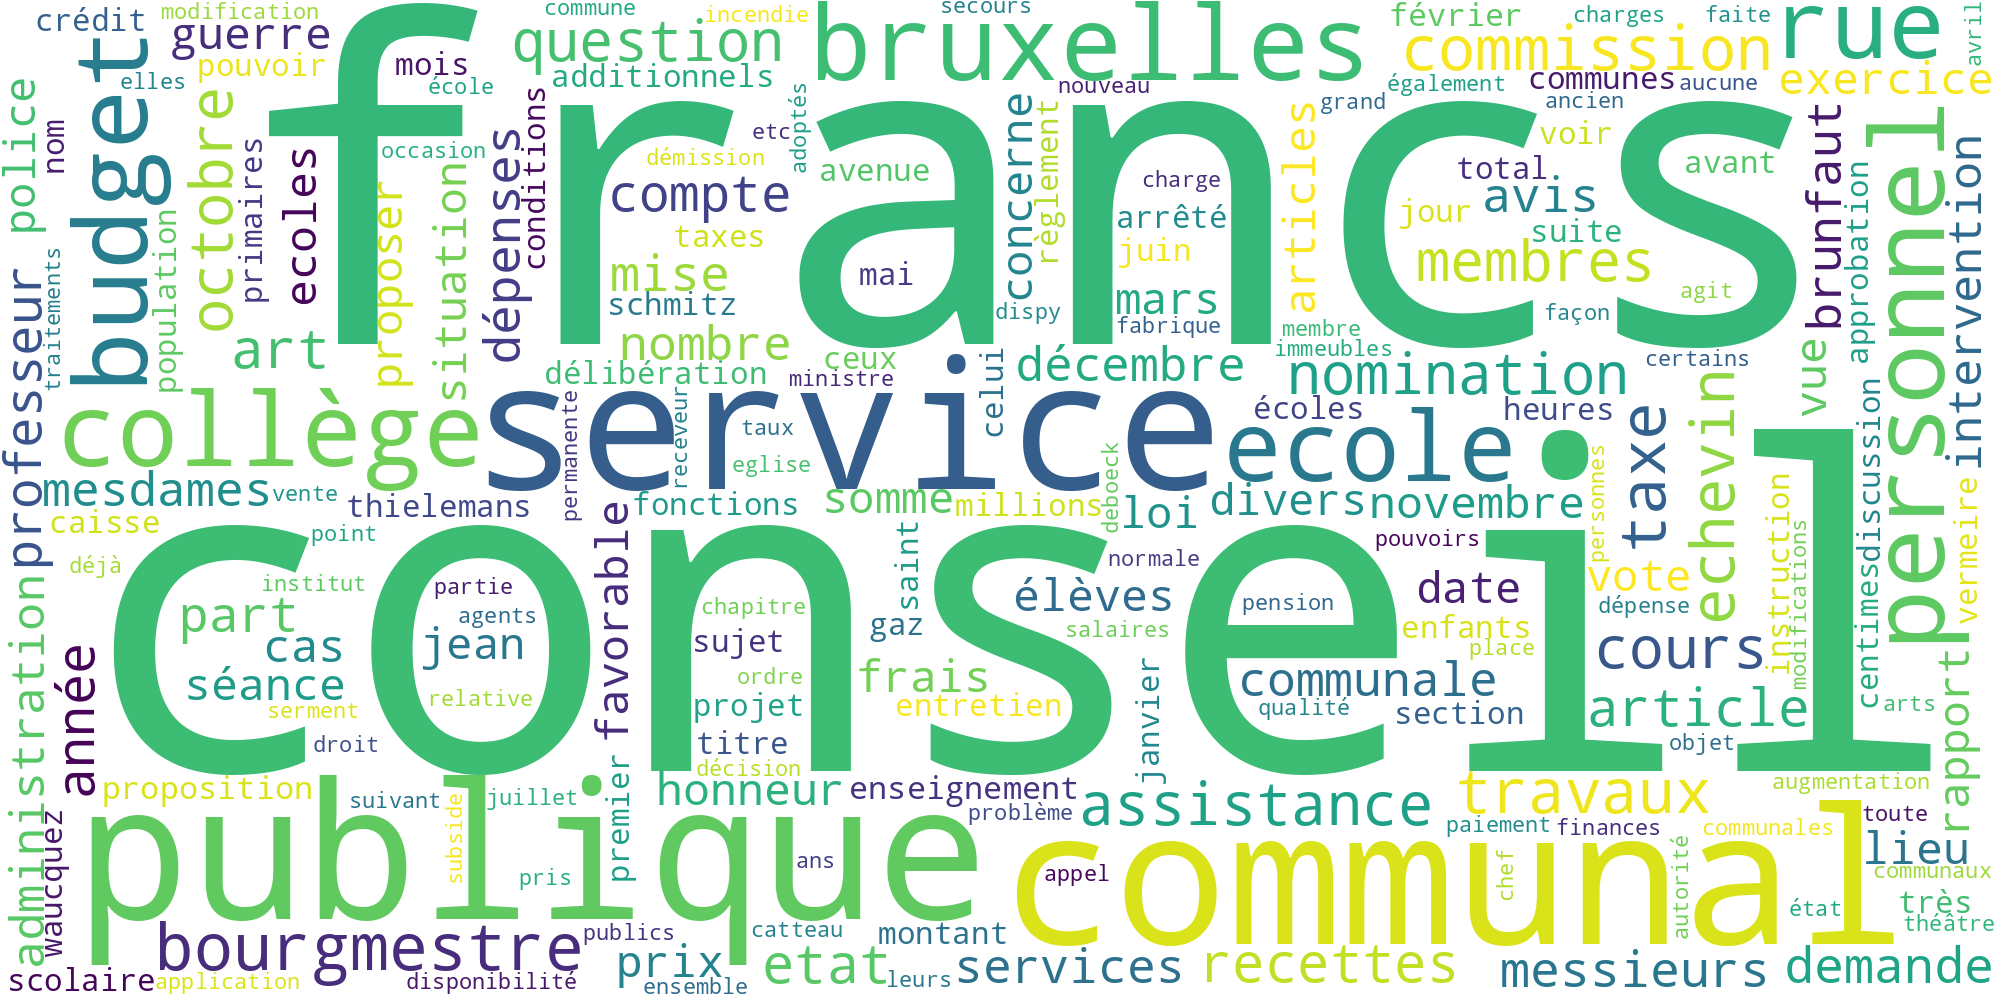

In [16]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))